# Worksheet 11 — Artificial Neural Network for Tabular Data (Wine dataset)

**Objective.**  
To Complete Worksheet 11 using the `sklearn.datasets.load_wine()` dataset. We'll follow these steps:
1. Load dataset and convert to `pandas` DataFrame.
2. Exploratory data analysis (shape, class distribution, basic stats, missing-values).
3. Preprocessing: train/test split, scaling.
4. Build an `MLPClassifier` pipeline, train, and evaluate.
5. Cross-validation and (optional) simple grid search.

In [9]:
"""
Imports and global settings
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

RANDOM_STATE = 42

Load dataset & convert to DataFrame

In [10]:
"""
Load the Wine dataset and convert to pandas DataFrame.

Outputs:
- df: DataFrame containing features + target
- X, y: feature DataFrame and target Series
"""
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')
df = pd.concat([X, y], axis=1)

print("Loaded Wine dataset.")
print("Shape (samples, features):", X.shape)
print("Target names:", list(wine.target_names))


Loaded Wine dataset.
Shape (samples, features): (178, 13)
Target names: [np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]


## Exploratory Data Analysis (EDA)

Show first rows, class distribution, missing values, and basic descriptive statistics.

In [11]:
"""
EDA - head, class distribution, missing-values, summary stats
"""
# Display first rows
display(df.head())

# Class distribution
print("\nClass distribution (counts):")
print(y.value_counts().sort_index())

# Missing value checks
print("\nMissing values per column:")
print(df.isna().sum())

# Summary statistics
print("\nFeature summary statistics:")
display(X.describe().T)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0



Class distribution (counts):
target
0    59
1    71
2    48
Name: count, dtype: int64

Missing values per column:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Feature summary statistics:


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


## Questions (Dataset Overview)

1. How many samples and features does the dataset contain?  

    ▶ The dataset contains **178 samples** and **13 features**.  

2. What are the different wine classes (targets) and their distribution?  

    ▶ There are three target classes with the following distribution:  
       - Class 0: 59 samples  
       - Class 1: 71 samples  
       - Class 2: 48 samples  

3. Are there any missing values in the dataset?  

    ▶ No, there are no missing values in the dataset. All feature columns contain complete data.  

4. What are the names of the three wine classes?  

    ▶ The names of the three wine classes are:  
       - class_0  
       - class_1  
       - class_2

### Split & scaling

In [12]:
"""
Data splitting and scaling (implemented per worksheet TODOs)

- Separate features and target
- Train/test split (80/20), stratified, random_state=42
- Fit StandardScaler on training data only and transform both sets
"""
# Separate features and target
X = X  # already prepared above
y = y  # already prepared above

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# Initialize and fit StandardScaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)
print("Scaler mean (first 5 values):", np.round(scaler.mean_[:5], 4))
print("Scaler scale (first 5 values):", np.round(scaler.scale_[:5], 4))


Training set shape: (142, 13)
Testing set shape: (36, 13)
Scaler mean (first 5 values): [12.9715  2.34    2.3649 19.6254 99.6338]
Scaler scale (first 5 values): [ 0.7997  1.0974  0.2674  3.3689 14.8848]


**Questions (Data splitting & scaling)**

1. Why do we split the data before scaling?  

    ▶ We split first so the test set stays unseen, this ensures evaluation is honest and not biased by information from the test data.  

2. Why should we fit the scaler only on training data?  

    ▶ We fit the scaler only on training data to avoid data leakage. Using test data to compute scaling would let the model indirectly see test information.  

3. What is the purpose of using random_state?  

    ▶ random_state makes the split (and other randomized steps) reproducible so results can be repeated exactly.  

4. What do the scaler’s mean and scale attributes represent?  

    ▶ scaler.mean_ is the per-feature mean computed on training data; scaler.scale_ is the per-feature standard deviation used to scale features to unit variance.  

Define and instantiate MLP

In [13]:
"""
Create MLP classifier per worksheet specification.

Specifications:
- Two hidden layers with 50 and 25 neurons respectively
- ReLU activation
- Adam optimizer
- max_iter = 500
- random_state = 42
"""
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=RANDOM_STATE
)

print("Model architecture:", mlp.hidden_layer_sizes)
print("Activation function:", mlp.activation)
print("Solver:", mlp.solver)
print("Maximum iterations:", mlp.max_iter)


Model architecture: (50, 25)
Activation function: relu
Solver: adam
Maximum iterations: 500


Train the model

In [14]:
"""
Train the model using the scaled training data
"""
mlp.fit(X_train_scaled, y_train)

print(f"Training completed in {mlp.n_iter_} iterations")
print(f"Final training loss: {mlp.loss_:.6f}")
print(f"Training set accuracy: {mlp.score(X_train_scaled, y_train):.4f}")

# Check convergence
if mlp.n_iter_ == mlp.max_iter:
    print("Warning: Model may not have converged. Consider increasing max_iter.")
else:
    print("Model converged successfully.")


Training completed in 195 iterations
Final training loss: 0.006757
Training set accuracy: 1.0000
Model converged successfully.


**Questions (Training results)**

1. What does the loss value represent?  

    ▶ Loss measures how far the model's predictions are from the true labels (the objective the optimizer minimizes). Lower loss means the model fits the data better.  

2. How many iterations did the training take to converge?  

    ▶ Training took **195** iterations to stop.  

3. What might it mean if the loss is very high?  

    ▶ A very high loss suggests the model is not learning well — possible reasons: wrong hyperparameters (too high learning rate, insufficient capacity), poor feature scaling, bad data quality, or insufficient training.  

4. What is the training accuracy of your model?  

    ▶ Training accuracy is **1.0000** (i.e., 100% on the training set).

Make predictions & basic metrics

In [15]:
"""
Make predictions on the test set and calculate basic metrics
"""
# Make predictions
y_pred = mlp.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Number of test samples: {len(y_test)}")
print(f"Number of correct predictions: {int(sum(y_pred == y_test))}")


Test Accuracy: 1.0000 (100.00%)
Number of test samples: 36
Number of correct predictions: 36


Comprehensive evaluation & confusion matrix

Classification Report:
              precision    recall  f1-score   support

     class_0     1.0000    1.0000    1.0000        12
     class_1     1.0000    1.0000    1.0000        14
     class_2     1.0000    1.0000    1.0000        10

    accuracy                         1.0000        36
   macro avg     1.0000    1.0000    1.0000        36
weighted avg     1.0000    1.0000    1.0000        36



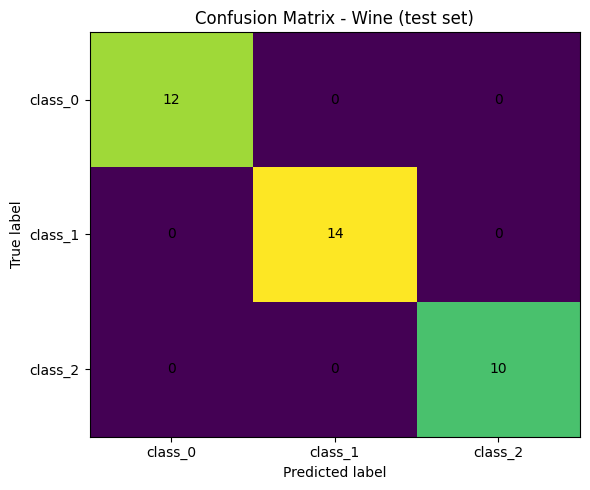


Per-class metrics:


,class,precision,recall,f1
0,class_0,1.0,1.0,1.0
1,class_1,1.0,1.0,1.0
2,class_2,1.0,1.0,1.0


In [16]:
"""
Detailed classification report and confusion matrix (matplotlib; no seaborn)
"""
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, interpolation='nearest', aspect='auto')
ax.set_title("Confusion Matrix - Wine (test set)")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticks(np.arange(len(wine.target_names)))
ax.set_yticks(np.arange(len(wine.target_names)))
ax.set_xticklabels(wine.target_names)
ax.set_yticklabels(wine.target_names)
# annotate
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center")
fig.tight_layout()
plt.show()

# Additional metrics (weighted)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0,1,2])
per_class_metrics = pd.DataFrame({
    'class': wine.target_names,
    'precision': np.round(prec,4),
    'recall': np.round(rec,4),
    'f1': np.round(f1,4)
})
print("\nPer-class metrics:")
display(per_class_metrics)

**Questions (Model evaluation)**

1. Which class has the best performance? Which has the worst?  

    ▶ All three classes performed equally well in this run — **all have perfect scores**.  

2. What is the precision, recall, and F1-score for each class?  

    ▶ Per-class metrics:  
       - class_0: precision=1.0000, recall=1.0000, f1=1.0000  
       - class_1: precision=1.0000, recall=1.0000, f1=1.0000  
       - class_2: precision=1.0000, recall=1.0000, f1=1.0000  

3. Based on the confusion matrix, what types of errors is the model making?  

    ▶ The confusion matrix indicates **no errors** on the test set (all predictions are correct for this run: the confusion matrix is diagonal).  

4. Is there any class imbalance affecting the results?  

    ▶ The dataset has different class counts (59, 71, 48), but not extreme imbalance. In this run the classifier achieved perfect test accuracy, so imbalance did not negatively affect results — however in general you should check metrics like precision/recall and use stratified splits (we did) for fair evaluation.